**Requirements / Notes**:
- This notebook expects your dataset layout similar to the repository: `Dataset/train/<class>/...` and `Dataset/test/<class>/...`.
- If you have a local pretrained classification weights file (e.g., `yolo11n-cls.pt`), the notebook will prefer it; otherwise it will use an Ultralytics hub model like `yolov8n-cls.pt`.
- Run the `pip install` cell below once in a fresh environment. Use a GPU-enabled environment for faster training.

In [ ]:
%pip install ultralytics

In [1]:
from ultralytics import YOLO

# Load a pretrained model
model = YOLO("yolo11n-cls.pt")

In [ ]:
# Train the model
# DataSet from https://www.kaggle.com/datasets/kshitij192/cars-image-dataset

results = model.train(data="Dataset", epochs=20, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.234 🚀 Python-3.12.3 torch-2.9.1+cu128 CPU (Intel Core i7-10510U 1.80GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Dataset, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=

In [3]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
print(f"Top-1 Accuracy: {metrics.top1}")
print(f"Top-5 Accuracy: {metrics.top5}")

Ultralytics 8.3.234 🚀 Python-3.12.3 torch-2.9.1+cu128 CPU (Intel Core i7-10510U 1.80GHz)
YOLO11n-cls summary (fused): 47 layers, 1,534,991 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /home/ibrahim/Projects/car-classification/Dataset/train... found 3352 images in 7 classes ✅ 
val: /home/ibrahim/Projects/car-classification/Dataset/test... found 813 images in 7 classes ✅ 
test: /home/ibrahim/Projects/car-classification/Dataset/test... found 813 images in 7 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 656.3±302.3 MB/s, size: 9.8 KB)
val: Scanning /home/ibrahim/Projects/car-classification/Dataset/test... 813 images, 0 corrupt: 100% ━━━━━━━━━━━━ 813/813 469.5Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 51/51 1.2s/it 1:010.9sss
                   all       0.99      0.998
Speed: 0.0ms preprocess, 55.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/ibr

Training Results:


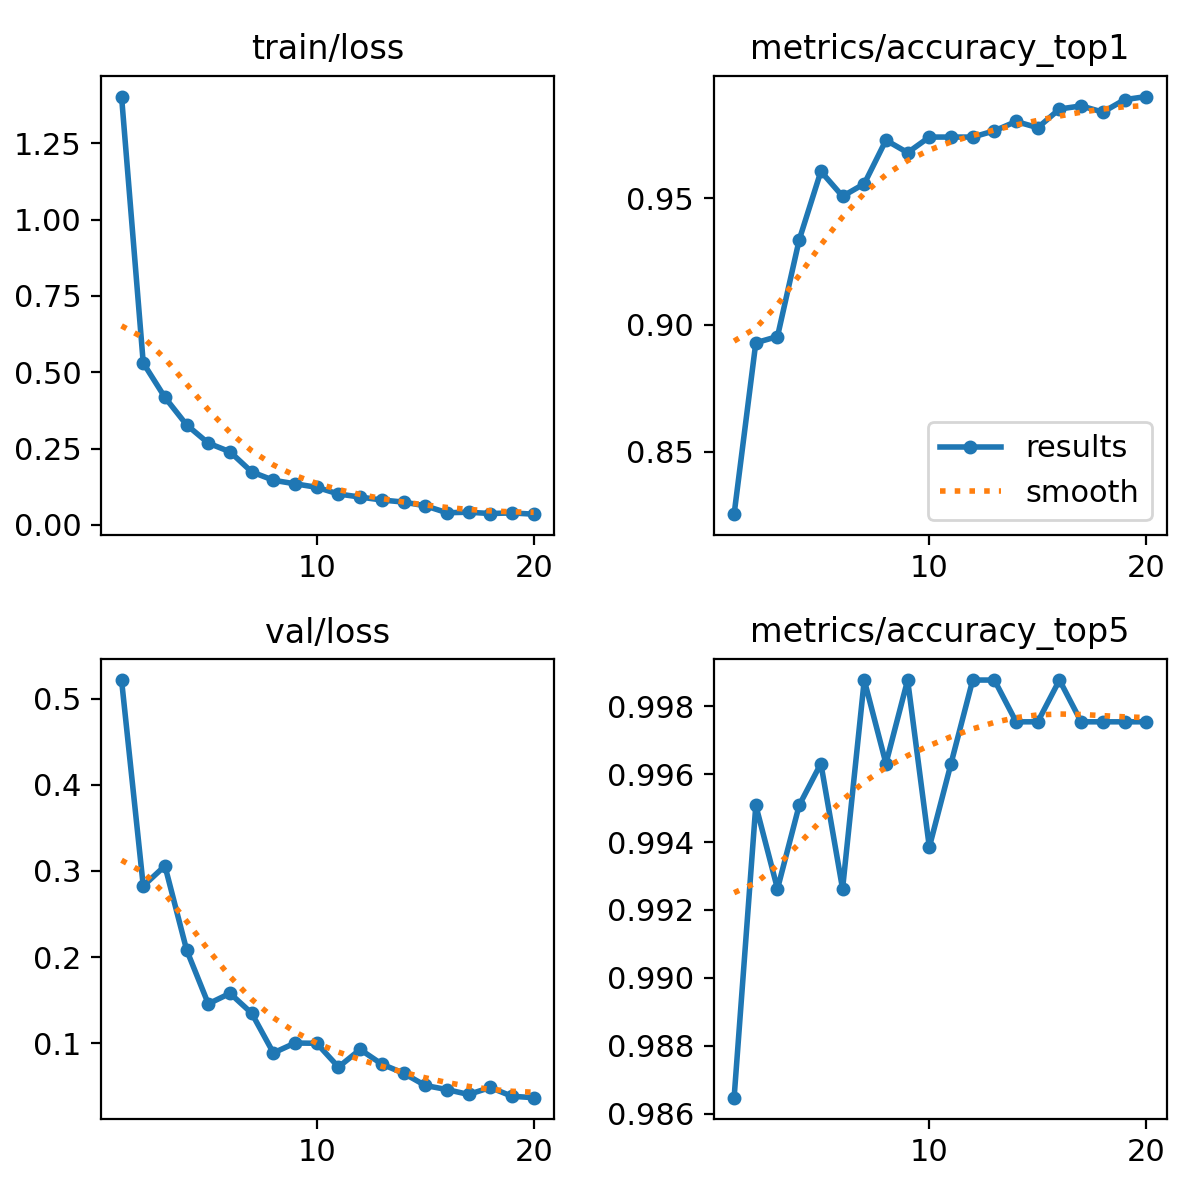

In [7]:
# Display training results plots
from IPython.display import Image, display
import os

# Find the latest training run directory
runs_dir = "runs/classify"
if os.path.exists(runs_dir):
    # Get the most recent training folder
    train_dirs = [d for d in os.listdir(runs_dir) if d.startswith('train')]
    if train_dirs:
        latest_train = sorted(train_dirs)[-1]
        results_path = os.path.join(runs_dir, latest_train, "results.png")
        
        if os.path.exists(results_path):
            print("Training Results:")
            display(Image(filename=results_path))
        else:
            print(f"Results plot not found at {results_path}")

Confusion Matrix:


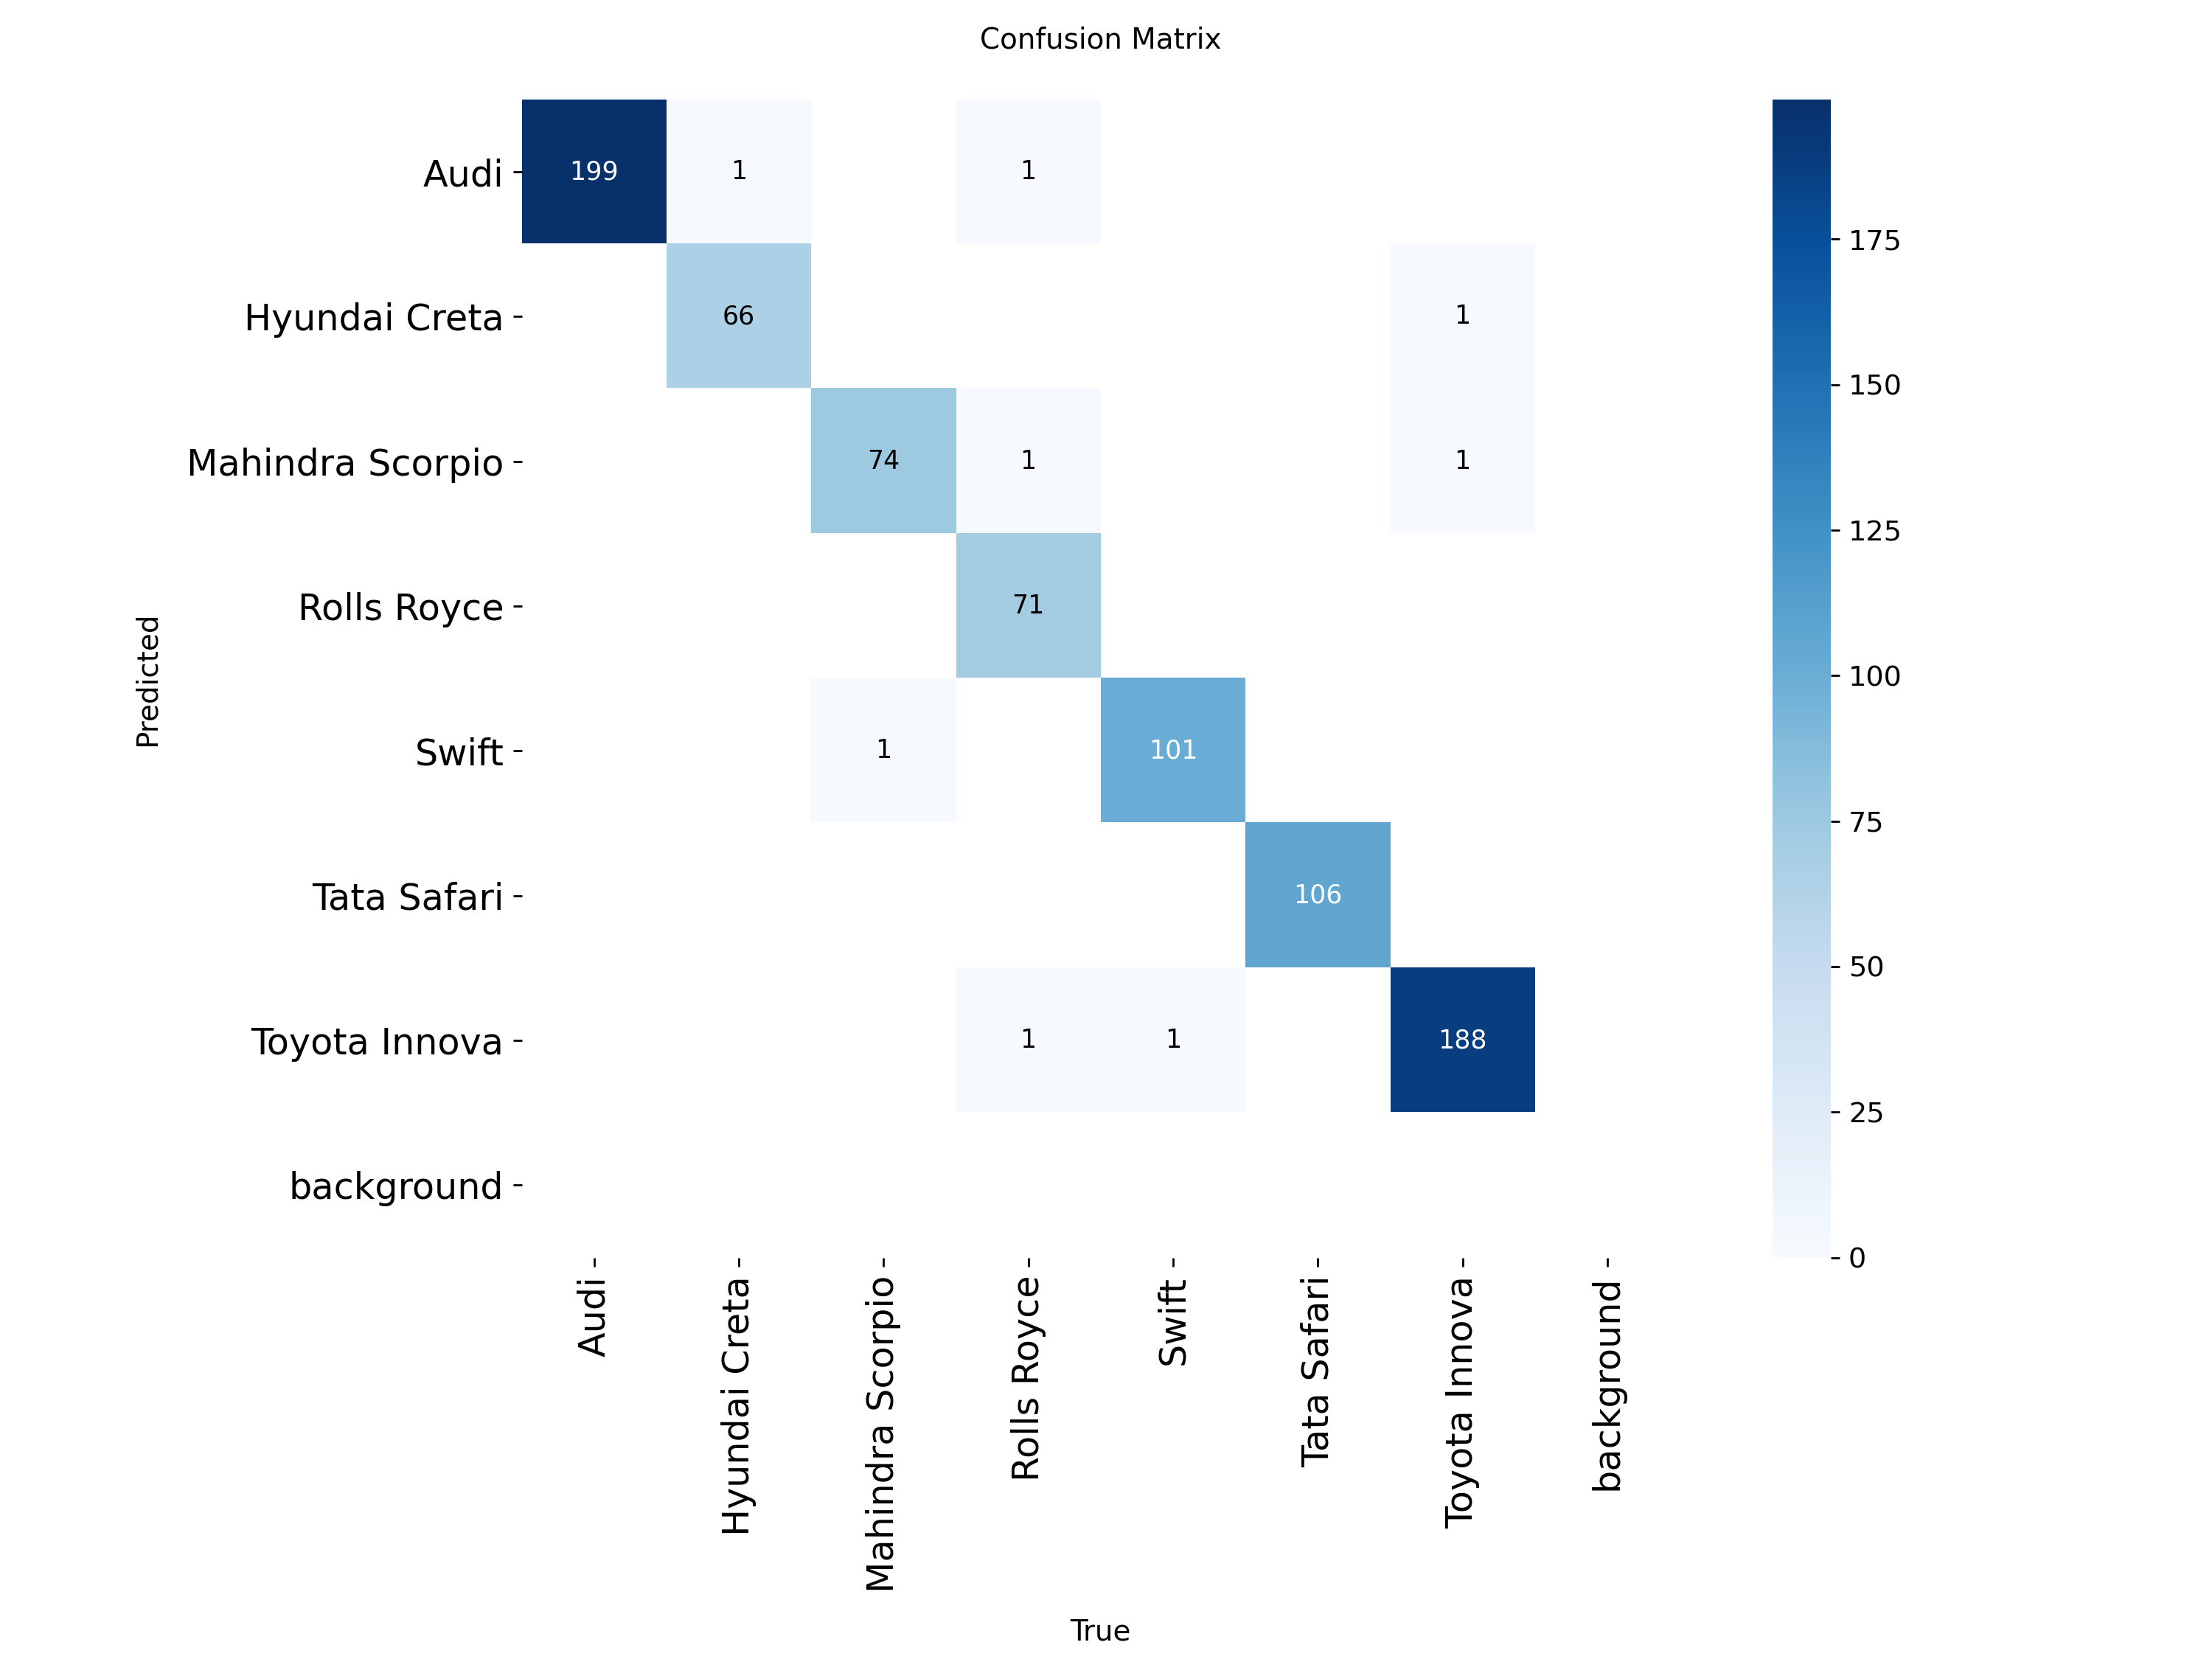

In [8]:
# Display confusion matrix
confusion_matrix_path = os.path.join(runs_dir, latest_train, "confusion_matrix.png")
if os.path.exists(confusion_matrix_path):
    print("Confusion Matrix:")
    display(Image(filename=confusion_matrix_path))
else:
    print("Confusion matrix not found")

In [29]:
# Display some prediction examples
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image as PILImage

# Define test_dir if not already defined
test_dir = Path("Dataset/test")

# Get some random test images
import random
random.seed(42)
image_files = []
for ext in exts:
    image_files.extend([str(p) for p in test_dir.rglob(ext)])

# Select random images to display
num_display = min(6, len(image_files))
random_images = random.sample(image_files, num_display)

# Run predictions
predictions = model.predict(source=random_images, conf=0.25, save=False)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (img_path, pred) in enumerate(zip(random_images, predictions)):
    if idx < 6:
        # Get the predicted class and confidence
        probs = pred.probs
        top_class = probs.top1
        top_conf = probs.top1conf.item()
        class_name = pred.names[top_class]
        
        # Display image
        img = PILImage.open(img_path)
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{class_name} ({top_conf:.2f})")

# Hide unused subplots
for idx in range(num_display, 6):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


0: 640x640 Swift 1.00, Mahindra Scorpio 0.00, Audi 0.00, Toyota Innova 0.00, Hyundai Creta 0.00, 55.3ms
1: 640x640 Toyota Innova 1.00, Audi 0.00, Rolls Royce 0.00, Tata Safari 0.00, Swift 0.00, 55.3ms
2: 640x640 Toyota Innova 1.00, Hyundai Creta 0.00, Audi 0.00, Swift 0.00, Rolls Royce 0.00, 55.3ms
3: 640x640 Rolls Royce 1.00, Audi 0.00, Mahindra Scorpio 0.00, Hyundai Creta 0.00, Toyota Innova 0.00, 55.3ms
4: 640x640 Audi 1.00, Rolls Royce 0.00, Toyota Innova 0.00, Mahindra Scorpio 0.00, Hyundai Creta 0.00, 55.3ms
5: 640x640 Hyundai Creta 1.00, Swift 0.00, Toyota Innova 0.00, Audi 0.00, Mahindra Scorpio 0.00, 55.3ms
0: 640x640 Swift 1.00, Mahindra Scorpio 0.00, Audi 0.00, Toyota Innova 0.00, Hyundai Creta 0.00, 55.3ms
1: 640x640 Toyota Innova 1.00, Audi 0.00, Rolls Royce 0.00, Tata Safari 0.00, Swift 0.00, 55.3ms
2: 640x640 Toyota Innova 1.00, Hyundai Creta 0.00, Audi 0.00, Swift 0.00, Rolls Royce 0.00, 55.3ms
3: 640x640 Rolls Royce 1.00, Audi 0.00, Mahindra Scorpio 0.00, Hyundai Cret

<Figure size 1500x1000 with 6 Axes>

In [22]:
# Save the trained model
model.save("yolo11n-cls-trained.pt")